In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def analy(ymax, xmax, dxy, V, r1, r2):
    x_vals = np.arange(-xmax, xmax, dxy)
    y_vals = np.arange(-ymax, ymax, dxy)
    x, y = np.meshgrid(x_vals, y_vals)
    
    r = np.sqrt(x**2 + y**2)
    mask_grid = (r >= r1)   # Ensure the mask applies to the range between r1 and r2
    
    pot = np.zeros_like(r)
    theta = np.arctan2(y, x)  # Calculate theta for the entire grid
    

    # Now calculate the potential
    pot[mask_grid] = (r[mask_grid] - (r[mask_grid]**-1) * r1**2) * (-V / xmax * np.cos(theta[mask_grid])) 
    
    return pot

def poisson(ymax, xmax, dxy, V, r1, r2):
    x = np.arange(-xmax, xmax, dxy)
    y = np.arange(-ymax, ymax, dxy)
    X, Y = np.meshgrid(x, y)
    
    u = np.zeros_like(X)
    r = np.sqrt(X**2 + Y**2)

    # Create a mask for the region between r1 and r2
    mask = (r >= r1) 
    inner=(r < r1)
    

    def bounds(grid):
        # Apply boundary conditions using the mask
        grid[:, 0] = V   # Set the leftmost column to V
        grid[:, -1] = -V  # Set the rightmost column to -V
        grid[inner] =0  # Set the inner region
        grid[(0,-1), 1:-1] = 0.25*(grid[(0,-1), 2:]+grid[(0,-1), :-2]+grid[(-1,-2), 1:-1]+grid[(1,0), 1:-1])
       
        

    bounds(u)  # Apply the boundary conditions initially
    
    diff = 1
    max_iter = 5000  # Cap the maximum number of iterations to avoid long runs
    iteration = 0

    while diff > 1e-12 :
    #while iteration < max_iter:
        u_new = u.copy()
        u_new[1:-1, 1:-1][mask[1:-1, 1:-1]] = 0.25 * (u[2:, 1:-1] + u[:-2, 1:-1] + u[1:-1, 2:] + u[1:-1, :-2])[mask[1:-1, 1:-1]]
        
        # Convergence check
        diff = np.max(np.abs(u_new - u))
        bounds(u_new)  # Reapply boundary conditions
        u = u_new
        #iteration += 1

    
    return u

# Parameters
ymax = 20  # Maximum y value
xmax = 20  # Maximum x value
r1 = 5  # Inner radius for the potential region
r2 = 9  # Outer radius for the potential region
dxy = 0.05 # Grid resolution (lower value results in more calculations)
V = 10

# Solve the Poisson equation
analpot = analy(ymax, xmax, dxy, V, r1, r2)
nupot = poisson(ymax, xmax, dxy, V, r1, r2)


# Calculate difference


ChangeInPot = np.abs(nupot- analpot)
# Plot the error
plt.figure(figsize=(10, 10))
plt.imshow(ChangeInPot, extent=(-xmax, xmax, -ymax, ymax), aspect='auto', cmap='Greys')


# Add circles at r1 and r2
theta_circle = np.linspace(0, 2 * np.pi, 1000)
x_circle1 = r1 * np.cos(theta_circle)
y_circle1 = r1 * np.sin(theta_circle)

    
plt.plot(x_circle1, y_circle1, color='black', linewidth=2, label=f'r = {r1} m')

plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Potential difference')
plt.title('Error between Numerical and Analytical Solution')
plt.show()



In [58]:
import csv

# Create a sample 2D array (5x5 array)

# Write the array to a CSV file
with open('dif.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(ChangeInPot)
with open('num.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(nupot)
with open('ana.csv', mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(analpot)

/tmp/ipykernel_1497340/3730894905.py:62: UserWarning: shading value 'edge' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(x, y, pot, shading='edge', cmap='PiYG')


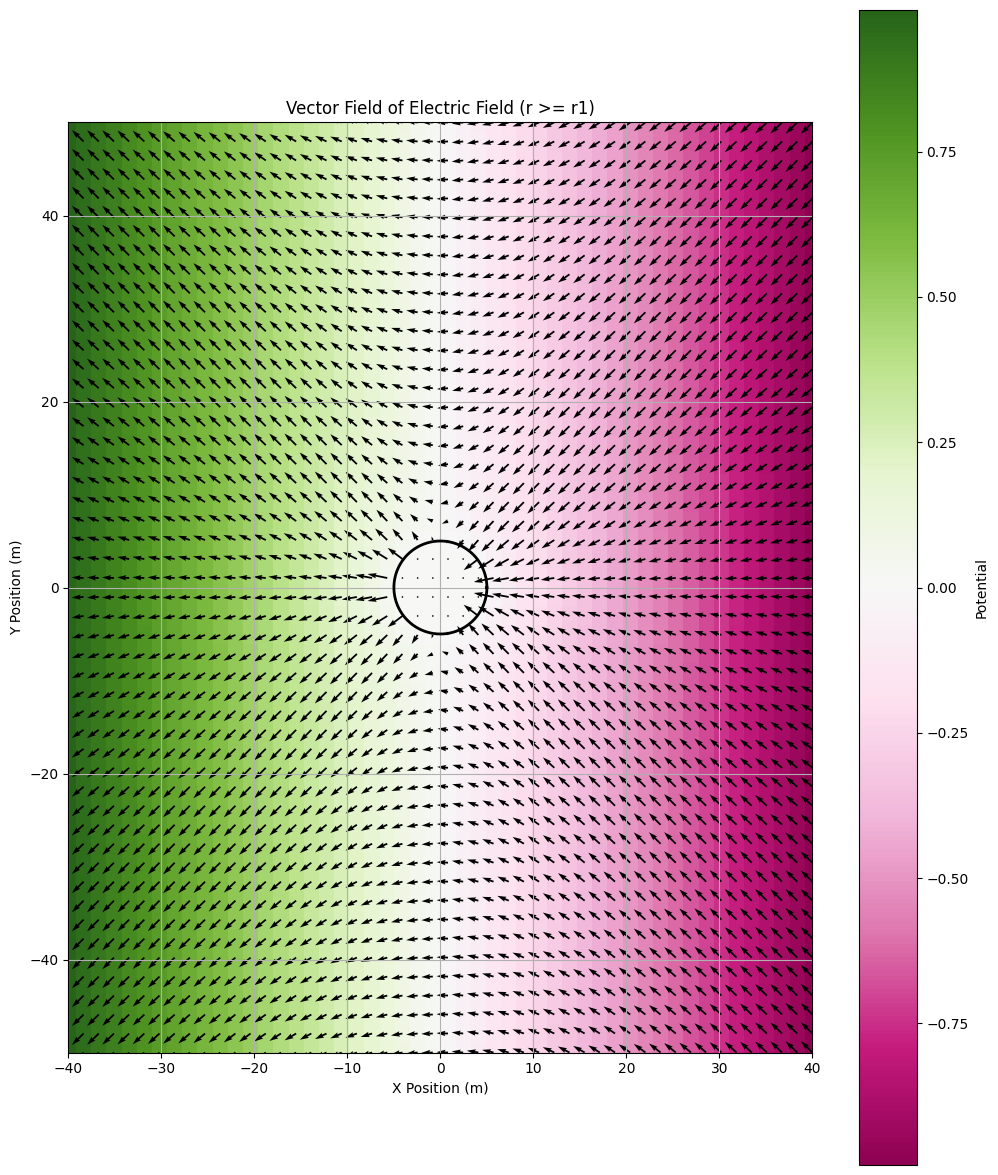

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r1 = 5  # Inner radius for the potential region
d = 40 # Grid limit for x and y
num_points = 50 # Number of points for the grid resolution
ymax=50

# Generate a grid of x and y values for the vector field
x_vals = np.linspace(-d, d, num_points)
y_vals = np.linspace(-ymax, ymax, num_points)

# Create meshgrid for plotting
x, y = np.meshgrid(x_vals, y_vals)

# Calculate the radial distance from the origin
r = np.sqrt(x**2 + y**2)

# Only keep values where r >= r1 (mask the region inside r1)
mask = r >= r1

# Initialize the components of the vector field (u and v)
u = np.zeros_like(x)
v = np.zeros_like(y)

# Compute the electric field components only for points where r >= r1
V = 1  # Potential scaling constant (set appropriately for your problem)
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        if mask[j, i]:  # Only process points where r >= r1
            r_ij = r[j, i]
            
            theta = np.arctan2(y[j, i], x[j, i])  # Angle for polar coordinates

            # Radial component (dV/dr)
            dV_dr = (V/d)*(np.cos(theta)*(r1**2)/r_ij**2 + np.cos(theta))

            # Angular component (dV/dtheta)
            dV_dtheta = (V/d)*(np.sin(theta)*(r1**2)/r_ij**2 - np.sin(theta))

            # Convert the polar electric field components to Cartesian components
            u[j, i] = -dV_dr * np.cos(theta) + dV_dtheta * np.sin(theta)
            v[j, i] = -dV_dr * np.sin(theta) + dV_dtheta * np.cos(theta)

# Now, let's calculate the potential based on the mask condition
pot = np.zeros_like(x)  # Initialize the potential array with zeros

# Loop over each point to apply the mask and calculate the potential
for i in range(len(x_vals)):
    for j in range(len(y_vals)):
        if mask[j, i]:  # Only calculate potential where r >= r1
            r_ij = r[j, i]
            theta = np.arctan2(y[j, i], x[j, i])  # Angle for polar coordinates
            # Calculate potential based on your formula
            pot[j, i] = (r_ij - (r_ij**-1) * r1**2) * ((-V/d) * np.cos(theta))

# Plotting the results
plt.figure(figsize=(12, 15))

# Plot the potential using pcolormesh
plt.pcolormesh(x, y, pot, shading='edge', cmap='PiYG')
plt.colorbar(label="Potential")

# Plot the vector field using quiver
plt.quiver(x, y, u, v, angles='xy', scale_units='xy', scale=.02, color='black')

# Add a circle at r1 (boundary of the region where r >= r1)
theta_circle = np.linspace(0, 2 * np.pi, 1000)
x_circle1 = r1 * np.cos(theta_circle)
y_circle1 = r1 * np.sin(theta_circle)

# Plot the circle at r1
plt.plot(x_circle1, y_circle1, color='black', linewidth=2)

# Set axis limits
plt.xlim(-d, d)
plt.ylim(-ymax, ymax)

# Make the aspect ratio equal (circular plot)
plt.gca().set_aspect('equal', adjustable='box')

# Title and labels
plt.title("Vector Field of Electric Field (r >= r1)")
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')

# Add grid for better visualization
plt.grid(True)

# Show the plot
plt.show()


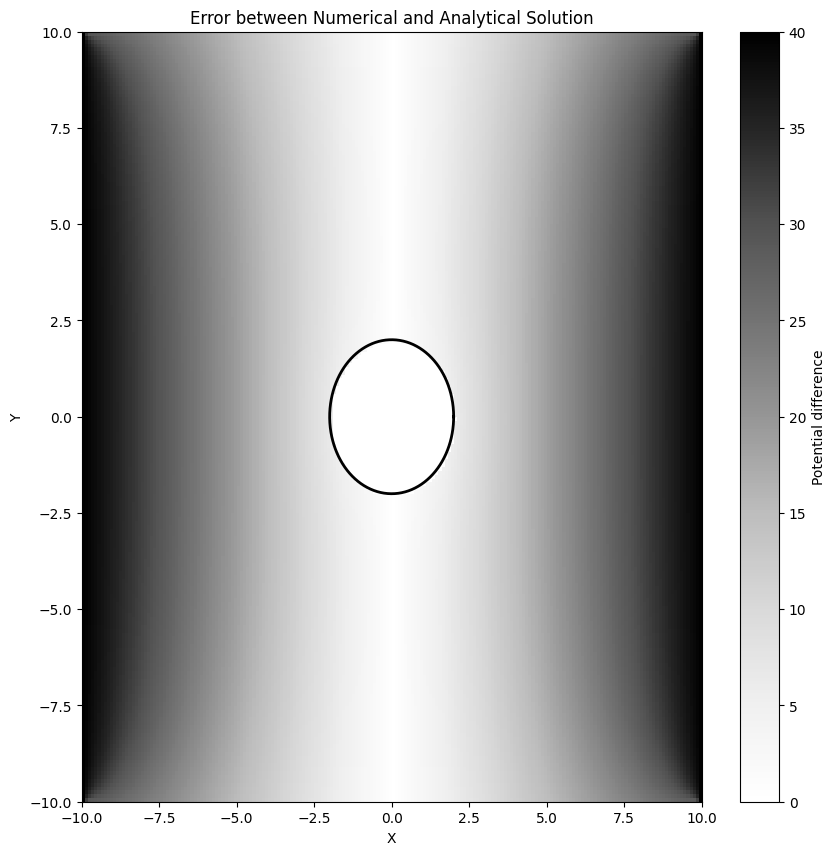

In [86]:
import numpy as np
import matplotlib.pyplot as plt

def analy(ymax, xmax, dxy, V, r1, r2):
    x_vals = np.arange(-xmax, xmax, dxy)
    y_vals = np.arange(-ymax, ymax, dxy)
    x, y = np.meshgrid(x_vals, y_vals)
    
    r = np.sqrt(x**2 + y**2)
    mask_grid = (r >= r1)   # Ensure the mask applies to the range between r1 and r2
    
    pot = np.zeros_like(r)
    theta = np.arctan2(y, x)  # Calculate theta for the entire grid
    # Now calculate the potential
    pot[mask_grid] = (r[mask_grid] - r[mask_grid] * r1**2) * (-V / xmax * np.cos(theta[mask_grid])) 
    
    return pot

def poisson(ymax, xmax, dxy, V, r1, r2):
    x = np.arange(-xmax, xmax, dxy)
    y = np.arange(-ymax, ymax, dxy)
    X, Y = np.meshgrid(x, y)
    
    u = np.zeros_like(X)
    r = np.sqrt(X**2 + Y**2)

    # Create a mask for the region between r1 and r2
    mask = (r >= r1) 
    inner = (r < r1)
    

    def bounds(grid):
        # Apply boundary conditions using the mask
        grid[:, 0] = V   # Set the leftmost column to V
        grid[:, -1] = -V  # Set the rightmost column to -V
        grid[inner] = 0  # Set the inner region
        # Add smoothing step at boundaries if necessary (use a different approach if needed)
        grid[(0,-1), 1:-1] = 0.25*(grid[(0,-1), 2:] + grid[(0,-1), :-2] +
                                   grid[(-1,-2), 1:-1] + grid[(1,0), 1:-1])

    bounds(u)  # Apply the boundary conditions initially
    
    diff = 1
    iteration = 0

    while diff > 1e-10 :  # Adjusted tolerance to be more reasonable
        u_new = u.copy()
        u_new[1:-1, 1:-1][mask[1:-1, 1:-1]] = 0.25 * (u[2:, 1:-1] + u[:-2, 1:-1] + u[1:-1, 2:] + u[1:-1, :-2])[mask[1:-1, 1:-1]]

        # Convergence check
        diff = np.max(np.abs(u_new - u))
        u = u_new

    return u

# Parameters
ymax = 10  # Maximum y value
xmax = 10  # Maximum x value
r1 = 2  # Inner radius for the potential region
r2 = 9  # Outer radius for the potential region
dxy = 0.1 # Increase grid resolution
V = 10

# Solve the Poisson equation
analpot = analy(ymax, xmax, dxy, V, r1, r2)
nupot = poisson(ymax, xmax, dxy, V, r1, r2)


# Calculate difference
ChangeInPot = np.abs(nupot - analpot)

# Plot the error
plt.figure(figsize=(10, 10))
plt.imshow(ChangeInPot, extent=(-xmax, xmax, -ymax, ymax), aspect='auto', cmap='Greys')

# Add circles at r1 and r2
theta_circle = np.linspace(0, 2 * np.pi, 1000)
x_circle1 = r1 * np.cos(theta_circle)
y_circle1 = r1 * np.sin(theta_circle)

plt.plot(x_circle1, y_circle1, color='black', linewidth=2, label=f'r = {r1} m')

plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar(label='Potential difference')
plt.title('Error between Numerical and Analytical Solution')
plt.show()